In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_final = pd.read_csv('df_final.csv')

In [3]:
df = df_final.drop('commande',axis=1)

In [4]:
df.shape

(5270, 72)

In [5]:
df.describe()

,agrumes,ail,assortiment,aubergine,autre,betterave,beurre,blette,breuil,carotte,...,savon,soupe,tisane,tomate,tomme de vache fraîche,viande de chèvre ou chevreau,viande de porc,viande de veau,vin ou cidre,yaourt
count,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,...,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000
mean,0.310247,0.051044,0.020683,0.035674,0.000380,0.049905,0.360152,0.066414,0.096584,0.092979,...,0.038330,0.012144,0.026186,0.107780,0.010816,0.272296,0.196964,0.042884,0.061101,1.060721
std,0.747457,0.220108,0.142335,0.185493,0.019479,0.217770,0.536472,0.249027,0.295419,0.290431,...,0.209952,0.109540,0.188080,0.310132,0.103446,0.583225,0.616646,0.260774,0.285117,1.246028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,5.000000,1.000000,1.000000,5.000000,6.000000,4.000000,4.000000,7.000000


## Essai Kmeans

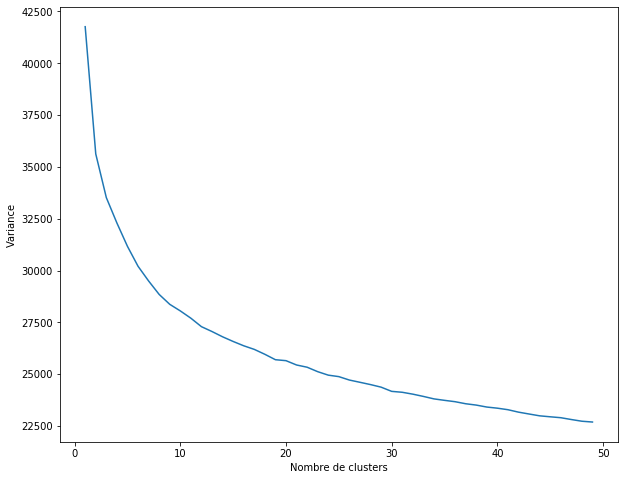

CPU times: user 1min 49s, sys: 7.34 s, total: 1min 56s
Wall time: 1min


In [20]:
%%time
# Sur données non standardisées (df)
# On essaie de trouver le nombre de cluster approprié
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
variance = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    variance.append(kmeans.inertia_)
plt.plot(range(1, 50), variance)
plt.xlabel('Nombre de clusters')
plt.ylabel('Variance')
plt.show()

In [21]:
# Graphiquement on constate qu'autour de 15 clusters la courbe à tendance à s'aplatir

In [22]:
# On découpe notre df en 15 classes
kmeans = KMeans(n_clusters=15)
kmeans.fit(df)
classes = kmeans.predict(df)

In [23]:
# On ajoute la colonne classe au dataframe avec les résultats obtenus
df_final['classe'] = classes

In [24]:
# Pour la lisibilité on met la colonne 'classe' au début de dataframe
cols = df_final.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_final = df_final[cols]
df_final

,yaourt,classe,commande,agrumes,ail,assortiment,aubergine,autre,betterave,beurre,...,salade,savon,soupe,tisane,tomate,tomme de vache fraîche,viande de chèvre ou chevreau,viande de porc,viande de veau,vin ou cidre
0,1,12,1743,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1750,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,6,1751,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2,14,1752,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,12,1753,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5265,4,13,7201,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5266,0,2,7202,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5267,0,2,7203,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5268,2,3,7204,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [25]:
df_final.describe()

,yaourt,classe,commande,agrumes,ail,assortiment,aubergine,autre,betterave,beurre,...,salade,savon,soupe,tisane,tomate,tomme de vache fraîche,viande de chèvre ou chevreau,viande de porc,viande de veau,vin ou cidre
count,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,...,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000
mean,1.060721,7.586717,4474.715560,0.310247,0.051044,0.020683,0.035674,0.000380,0.049905,0.360152,...,0.306072,0.038330,0.012144,0.026186,0.107780,0.010816,0.272296,0.196964,0.042884,0.061101
std,1.246028,4.452100,1583.315004,0.747457,0.220108,0.142335,0.185493,0.019479,0.217770,0.536472,...,0.511271,0.209952,0.109540,0.188080,0.310132,0.103446,0.583225,0.616646,0.260774,0.285117
min,0.000000,0.000000,1743.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,3100.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8.000000,4460.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,12.000000,5853.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,14.000000,7205.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,1.000000,5.000000,1.000000,1.000000,5.000000,6.000000,4.000000,4.000000


In [40]:
sum_column = df_final[df_final.classe == 1].sum(axis=0)

In [52]:
sum_column.sort_values(ascending=False)[2:]

courge                     332
tomate                     251
pomme de terre             224
salade                     209
piment                     168
                          ... 
poule                        0
autre                        0
pâte à tartiner              0
fromage de vache affiné      0
tomme de vache fraîche       0
Length: 72, dtype: int64

In [69]:
sum_column.sort_values(ascending=False).index

Index(['commande', 'classe', 'courge', 'tomate', 'pomme de terre', 'salade',
       'piment', 'fromage de chèvre', 'oignon', 'poireaux', 'yaourt',
       'concombre', 'aubergine', 'jus ou sirop', 'beurre', 'betterave',
       'pommes', 'fromage blanc', 'viande de chèvre ou chevreau', 'lait',
       'creme fraiche', 'carotte', 'fromage de brebis fermier', 'fenouil',
       'blette', 'poulet', 'poivron', 'celeri', 'persil', 'potimarron',
       'pastèque', 'confiture', 'breuil', 'epinard', 'radis', 'ail',
       'viande de veau', 'miel', 'agrumes', 'melon', 'huile', 'pollen',
       'viande de porc', 'pâtes', 'chou', 'savon', 'vin ou cidre',
       'fromage pérail de brebis', 'navet', 'pintade', 'mamia', 'ciboulette',
       'petit pois', 'feves', 'soupe', 'assortiment', 'farine', 'kiwi',
       'coulis', 'oeufs', 'echalote', 'tisane', 'cerises', 'patidou',
       'haricots verts', 'pêches', 'pain d'épices', 'compote', 'polenta',
       'poule', 'autre', 'pâte à tartiner', 'fromage de va

In [68]:
sum_column.sort_values(ascending=False)[2:3].index

Index(['courge'], dtype='object')

## TODO
boucle qui exporte les 20 articles les plus frequemment achetés par classe, et les mettre dans une liste à deux dimension (d'abord la classe puis les article)
Par exemple si le modèle retourne que le panier user à la classe 7.
On tape recommandation[7-1] et ça retourne la liste des articles les plus fréquents de la classe 7 (classé par ordre). Du coup on regarde si recommandation[6][0] est déjà dans le panier user et sinon on lui propose, sinon on passe à recommandation[6][1]